<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab2_Capacitors/blob/main/Lab2_Capacitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2. Capacitor experiment
Moodle: https://moodle2222.technion.ac.il/mod/resource/view.php?id=1119329

[.pdf manual](https://moodle2222.technion.ac.il/pluginfile.php/1816957/mod_resource/content/2/%D7%AA%D7%93%D7%A8%D7%99%D7%9A%20%D7%A7%D7%91%D7%9C%20%D7%90%D7%91%D7%99%D7%91%202022.pdf)

Evgeny Kolonsky, Feb 2023
Update Apr 2023

## Setup
1. Capacitor experiment kit:
  - Aluminium disks 260mm x2 on plate, dielectric sheet
  - Aluminium disks 180mm x2 on plate, dielectric sheet
  - dock board
  - banana wires short-length, x2
2. Wires:
  - coaxial-banana, x1 
  - coaxial, x3  
3. Measurement equipment:
  - Scope Keysight
  - LCR 
  - Caliper


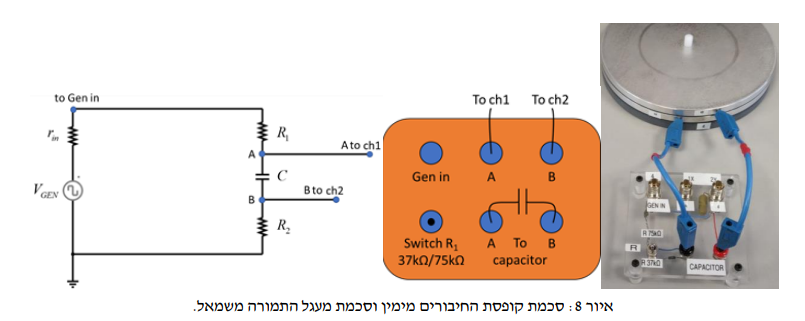

## Keysight Scope setup hints:

- **WaveGen**: freq 500Hz, Vpp =5V, Offset = 2.5V. 
- **Trigger**: Edge, Source: WaveGn
- **Acquire**: Averaged 256
Signal on channel 2 could go noisy. In this case reset with "AutoScale" button.



Setupe text:
ANALOG

Ch 1 Scale 780 mV/, Pos 2.34 V, Coup DC, BW Off, Inv Off, Imp 1M Ohm, Trace 

Ch 2 Scale 19 mV/, Pos -38.48 mV, Coup DC, BW Off, Inv Off, Imp 1M Ohm, Trace 

TRIGGER

Sweep Mode Auto, Coup DC, Noise Rej Off, HF Rej Off, Holdoff 40.0 ns

Mode EDGE, Source WGEN, Slope POS, Level 0 

ACQUISITION

Mode AVER, Realtime On, Vectors On, Persistence Off

ANALOG
Ch 1 Scale 780 mV/, Pos 2.34 V, Coup DC, BW Off, Inv Off, Imp 1M Ohm, Trace Label 1
     Probe 1 : 1, Skew 0 s
Ch 2 Scale 19 mV/, Pos -38.48 mV, Coup DC, BW Off, Inv Off, Imp 1M Ohm, Trace Label 2
     Probe 1 : 1, Skew 0 s

TRIGGER
Sweep Mode Auto, Coup DC, Noise Rej Off, HF Rej Off, Holdoff 40.0 ns
Mode EDGE, Source WGEN, Slope POS, Level 0 

HORIZONTAL
Mode MAIN, Ref CENT, Main Scale 50 µs/, Main Delay 1.192 ms

ACQUISITION
Mode AVER, Realtime On, Vectors On, Persistence Off

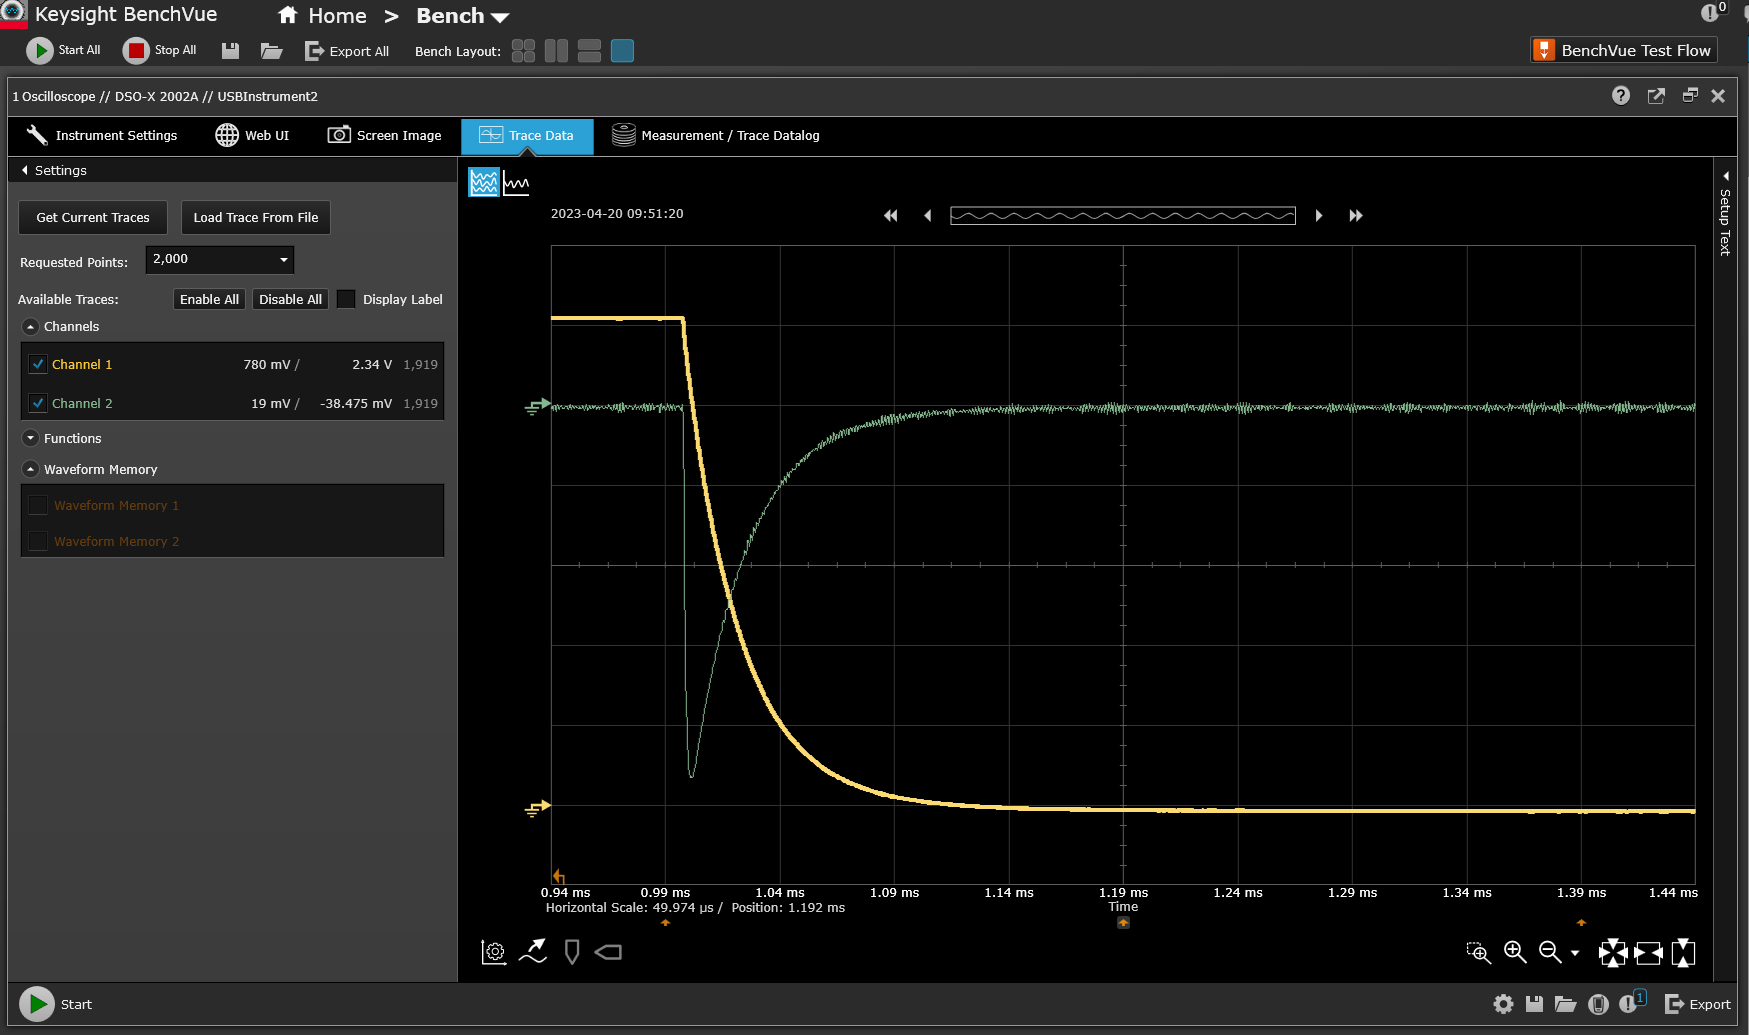

## Benchvue export hints:

- Get trace data
- Export CSV. 
- Include setup data
- do not change file names 
- do not edit files



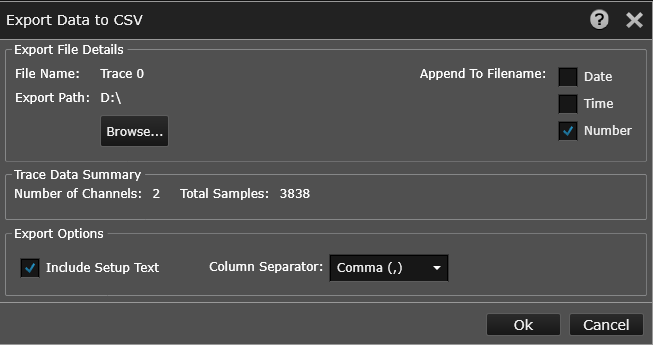


## Save files to github.com

https://github.com/evgeny-kolonsky/Lab2_Capacitors

- Save files to folder /Cxx, where Cxx - number of set.
- write down experiment parameters in Experiments.csv table.

In [ ]:
!pip install quantiphy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.2 MB/s eta 0:00:00


In [ ]:
import numpy as np # math functions
import scipy # scientific functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd # handling data structures (loaded from files)
from scipy.stats import linregress # contains linregress (for linear regression)
from scipy.optimize import curve_fit as cfit # non-linear curve fitting
from sklearn.metrics import r2_score # import function that calculates R^2 score
import json, requests
import pandas as pd

from quantiphy import Quantity



In [ ]:
def q_Farad(x):
  return str(Quantity(x,'F'))

### 1. Build the plate capacitor with the largest possible capacitance in the system, without using the dielectric material.
Calculate its capacitance from the formula.

$$ C = {A \varepsilon_0 \varepsilon_r \over d}$$ 

Make square impuls: freq 500Hz, Vpp =5V, Offset = 2.5V. Catch discharge on the scope using Trigger - WaveGen. Acquire Averaged signal.


### 4. Method A. Direct capacitance $C$ measurement

### 4. Method B. Capacitance $C$ calculation

$$Q = C V$$

$$ Q = \int_0^t I(t) dt$$

### 6. Decay time $\tau$ calculation

$$ \tau = R C$$



# Reproduce calcs with github-stored data

### Class definitions, bla-bla-bla

In [ ]:
class Board:
  url = ''
  num = ''
  option = ''
  R_in = 50 # Ohm
  R1 = 0
  R2 = 0
  R = 0

  def __init__(self, num, option='1', url='https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Capacitors/main/'):
    self.url = url + 'Boards.csv'
    self.num = num
    self.option = option
    df = pd.read_csv(self.url)
    row = df[(df.Set == self.num) & (df.Option == option)]
    self.R1 = row.R1.tolist()[0]
    self.R2 = row.R2.tolist()[0]
    self.R = self.R_in + self.R1 + self.R2

class Capacitor:
  url = ''
  num = ''
  size = 0
  side = ''
  square = 0
  d = np.array([0,0,0])
  C_calculated = 0
  C_measured = 0

  def __init__(self, num, size=260, side='A', url='https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Capacitors/main/'):
    eps0 = scipy.constants.epsilon_0
    self.num = num
    self.size = size
    self.side = side
    diam = float(self.size) *1e-3 # mm->m
    self.square = np.pi*diam*diam/4
    self.url = url + 'Disks.csv'
    df = pd.read_csv(self.url)
    row = df[(df.Set == num) & (df.Diam==size) & (df.Side==side)]
    d1, d2, d3 = row.d1.tolist()[0], row.d2.tolist()[0], row.d3.tolist()[0]
    self.d = np.array([d1, d2, d3]) *1e-3 # mm -> m
    self.C_calculated = self.square/np.mean(self.d) * eps0
    self.C_measured = row.C_measured.tolist()[0] *1e-12 ## pF -> F 

class Experiment:
  num = ''
  trace_num = 0
  fname = ''
  url = ''
  board = ''
  capacitor = ''
  data = ''
  Vx = ''
  Vy = ''
  time = ''
  Q = ''
  I = ''
  C_Q = 0
  C_tau = 0
  filter = ''

  def reset_filter(self):
    self.filter = np.full(self.time.shape, True)
    return

  def cut_Vx(self, low, high):
    self.filter = self.filter * (self.Vx > low) * (self.Vx < high)
    return

  def cut_t(self, low, high):
    self.filter = self.filter * (self.time < high) * (self.time > low)
    return

  def __init__(self, num, trace_num=0,
               url='https://raw.githubusercontent.com/evgeny-kolonsky/Lab2_Capacitors/main/'):
    self.num = num
    self.trace_num = trace_num
    print('Read from Experiments table..')
    self.url = url + 'Experiments.csv'
    df = pd.read_csv(self.url)
    row = df[(df.Set == num) & (df.Trace==trace_num)]
    self.size = row.Size.tolist()[0]
    self.side = row.Side.tolist()[0]
    self.option = row.Option.tolist()[0]
    print(f'Set {num}, Trace {trace_num}, Size {self.size} Side {self.side} Option {self.option}')
    print(f'Read from Board table: Set {num}, {self.option}')
    self.board = Board(num, self.option, url)
    print(f'R1 = {self.board.R1}')
    print(f'Read from Disks table: Set {num}, {self.size} {self.side}')
    self.capacitor = Capacitor(num, self.size, self.side, url)
    print(f'Capacitance measured {q_Farad(self.capacitor.C_measured)}')
    self.fname = f'{url}{num}/Trace%20{trace_num}.csv'
    self.data  = pd.read_csv(self.fname, header=1)
    columns = 'Time (s),1 (VOLT),2 (VOLT)'.split(sep=',')
    self.time = np.array(self.data[columns[0]])
    self.Vx = np.array(self.data[columns[1]])
    self.Vy = np.array(self.data[columns[2]])
    self.reset_filter()
    return

  
  def get_filtered_data(self):
    vx = self.Vx[self.filter]
    vy = self.Vy[self.filter]
    t  = self.time[self.filter]
    return t, vx, vy


  def Calculate_Q(self, show=True):
    # Q - method
    t, vx, vy = self.get_filtered_data()
    V_c = vx - vy
    I_c = vy / self.board.R2
    Q_c = scipy.integrate.cumtrapz(I_c, x=t, initial=0)
    self.Q = Q_c
    fit = linregress(V_c, Q_c)
    self.C_Q = fit.slope
    if show:
      s = str(Quantity(self.C_Q, 'F'))
      plt.plot(V_c, Q_c, label='$Q=\\int I dt$')
      plt.plot(V_c,fit.slope*V_c + fit.intercept, label=f'Q-method $C={s}$')
      plt.grid()
      plt.legend()
      plt.xlabel('Voltage, [V]')
      plt.ylabel('Charge, [C]')
      plt.title('$Q = C V$')
    return

  def Calculate_tau(self, show=True):
    t, vx, vy = self.get_filtered_data()
    V_c = vx - vy
    fit = linregress(t, np.log(V_c))
    beta = fit.slope
    tau_fit = -1/beta
    self.C_tau = tau_fit/self.board.R
    if show:
      plt.plot(t, np.log(V_c), label='Measurements')
      s = Quantity(self.C_tau, 'F')
      plt.plot(t, t*beta + fit.intercept, label=f'Tau-method $C$={s}')
      plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right')
      plt.grid()
      plt.legend()
      plt.ylabel('Log Voltage, [V]')
      plt.xlabel('Time, [s]')
      plt.title('$\log V = t/\\tau, \\tau = RC$')

    return

  def plot_V(self):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.set_xlabel('Time, [s]')
    ax1.set_ylabel('$V_x$, [V]')
    ax2.set_ylabel('$V_y$, [V]')

    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    t, vx, vy = self.get_filtered_data()

    ax1.plot(t, vx, color='yellow', marker='.', label='$V_a$')
    ax2.plot(t, vy, color='green', label='$V_b$')

    plt.grid()
    ax1.legend()
    ax2.legend()
    plt.show()
    return

  def print(self):
    print(f'Experiment parameters: Set {self.num}, trace {self.trace_num}, Size {self.size}, Side {self.side}, {self.option}')
    print('Calculated    :'+ q_Farad(ex.capacitor.C_calculated))
    print('Direct measure:'+ q_Farad(ex.capacitor.C_measured))
    print('Measure by Q  :'+ q_Farad(ex.C_Q))
    print('Measure by tau:'+ q_Farad(ex.C_tau))    




### Now we can get, plot and play with experimental data saved on github.

Read from Experiments table..
Set C01, Trace 0, Size 260 Side A Option R37
Read from Board table: Set C01, R37
R1 = 37600.0
Read from Disks table: Set C01, 260 A
Capacitance measured 427 pF


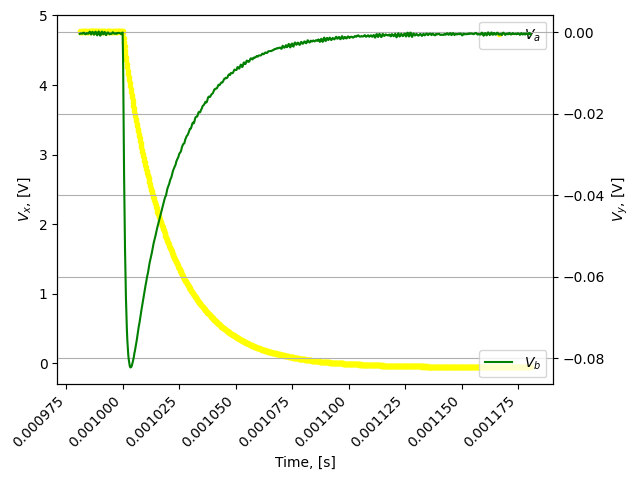

In [ ]:
ex = Experiment('C01', trace_num=0)
ex.plot_V()

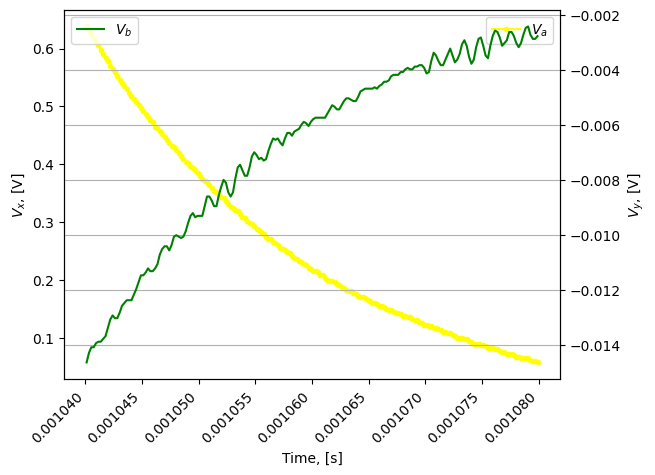

In [ ]:
ex.reset_filter()
ex.cut_t(0.00104, 0.00108)
ex.cut_Vx(0, 0.7)
ex.plot_V()

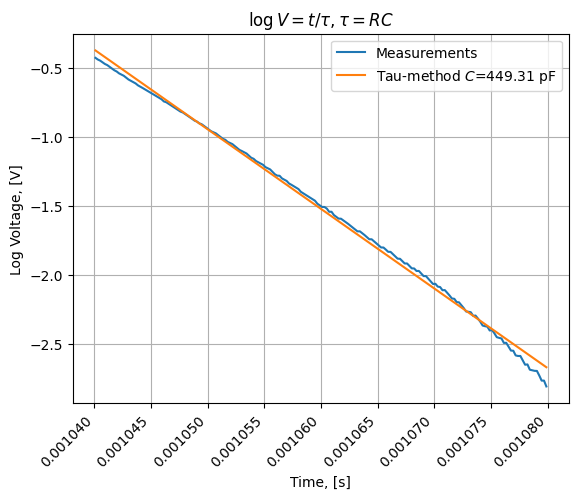

In [ ]:
ex.Calculate_tau()

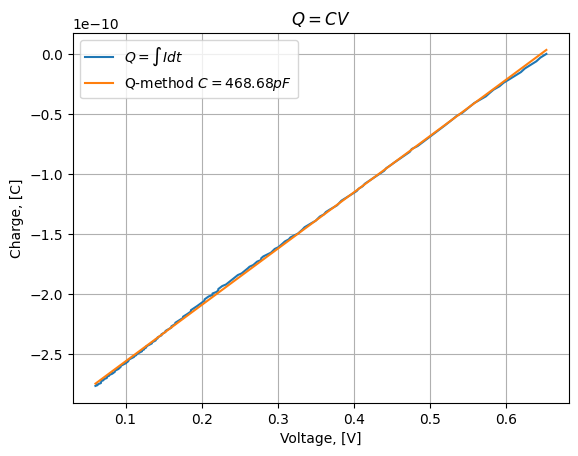

In [ ]:
ex.Calculate_Q()

In [ ]:
ex.print()

Experiment parameters: Set C01, trace 0, Size 260, Side A, R37
Calculated    :428.66 pF
Direct measure:427 pF
Measure by Q  :468.68 pF
Measure by tau:449.31 pF


Read from Experiments table..
Set C01, Trace 1, Size 260 Side B Option R37
Read from Board table: Set C01, R37
R1 = 37600.0
Read from Disks table: Set C01, 260 B
Capacitance measured 586 pF


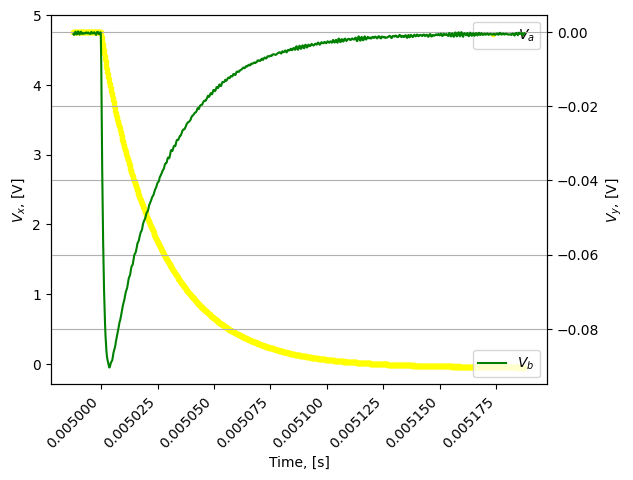

In [ ]:
ex = Experiment('C01', trace_num=1)
ex.plot_V()

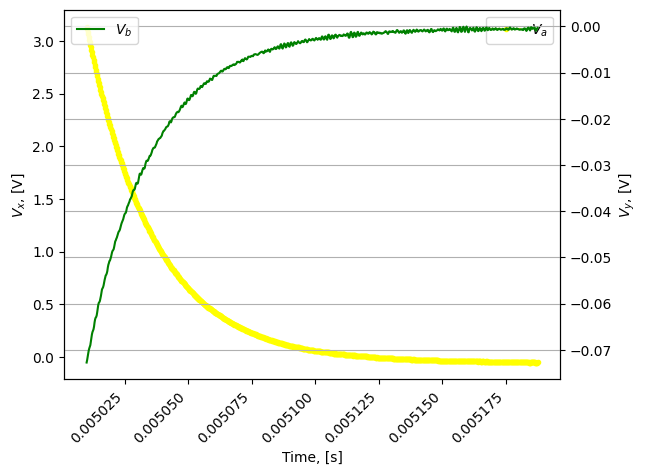

In [ ]:
ex.reset_filter()
ex.cut_t(0.00501, 1)
ex.plot_V()

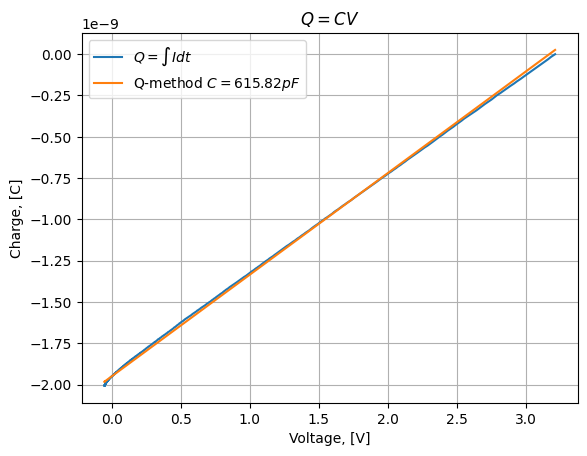

In [ ]:
ex.Calculate_Q()

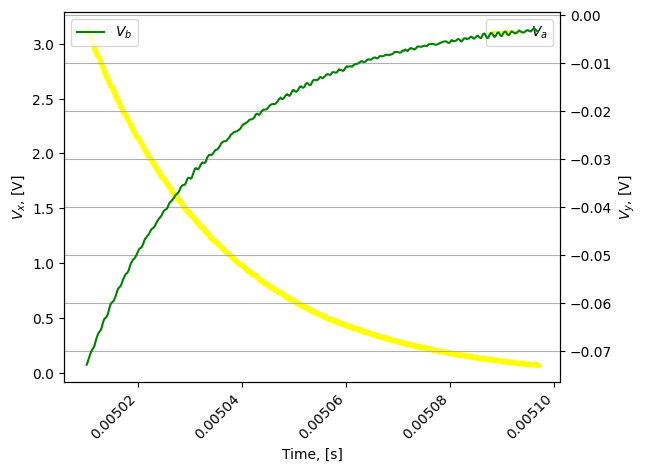

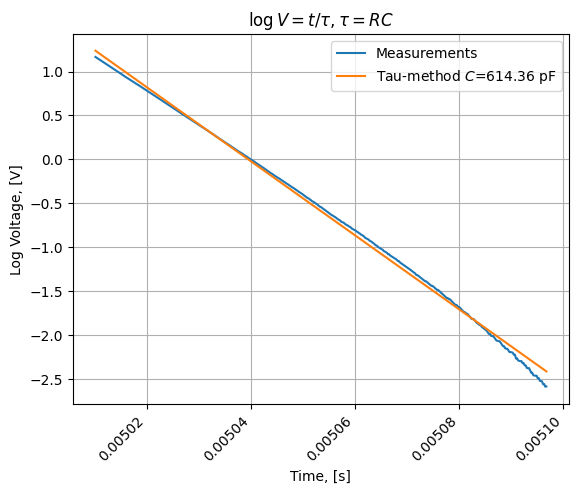

In [ ]:
ex.cut_Vx(0.07, 5)
ex.plot_V()
ex.Calculate_tau()

In [ ]:
ex.print()

Experiment parameters: Set C01, trace 1, Size 260, Side B, R37
Calculated    :592.56 pF
Direct measure:586 pF
Measure by Q  :615.82 pF
Measure by tau:614.36 pF
